<a href="https://colab.research.google.com/github/luanakwon/ML_Pytorch_pre2022/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using cv2 cascade classifier to collect face image dataset of certain youtuber

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# 폴더 경로
folder_path = 'drive/MyDrive/oking/'
# 가중치 경로
cascade_filename = folder_path + 'haarcascade_frontalface_alt.xml'
# 모델 불러오기
cascade = cv2.CascadeClassifier(cascade_filename)

In [ ]:
def videoDetector(cam,cascade):  
  fnum = 0
  inum = 0
  image = []
  while True:
    fnum += 1
    # 캡처 이미지 불러오기
    ret,img = cam.read()
    if not ret:
      break
    # 영상 압축
    img = cv2.resize(img,dsize=None,fx=0.75,fy=0.75)
    # 그레이 스케일 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # cascade 얼굴 탐지 알고리즘 
    results = cascade.detectMultiScale(gray,            # 입력 이미지
                                   scaleFactor= 1.1,# 이미지 피라미드 스케일 factor
                                   minNeighbors=5,  # 인접 객체 최소 거리 픽셀
                                   minSize=(300,300)  # 탐지 객체 최소 크기
                                   )        
                                   
    # 결과값 = 탐지된 객체의 경계상자 list                                                                           
    for box in results:
      inum += 1
      print("\r {} {} {}".format(inum, fnum, box),end="")
      # 좌표 추출       
      x, y, w, h = box
      # 경계 상자 그리기
      # cv2.rectangle(img, (x,y), (x+w, y+h), (255,255,255), thickness=2)
      image.append(cv2.resize(img[y:y+h,x:x+w],dsize=(160,160),interpolation=cv2.INTER_AREA))

  return image

    
    

In [ ]:
# 영상 파일 
cam = cv2.VideoCapture(folder_path + 'oking3.mp4')

image_list = videoDetector(cam, cascade)

 8152 11731 [532 244 336 336]

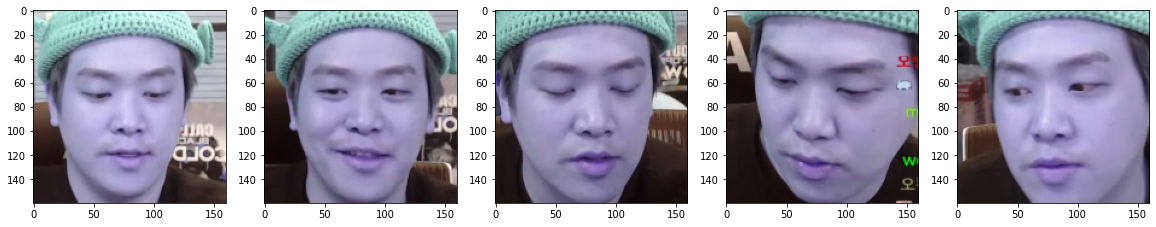

In [ ]:
import matplotlib.pyplot as plt
import random


plt.figure(figsize=(20,30))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(image_list[random.randrange(len(image_list))])

In [ ]:
for i,img in enumerate(image_list):
  cv2.imwrite(folder_path+'image/'+str(i+6697)+'.jpg',img)